<h1> Random Forest Regressor Example, aionlinecourse.com, Using White Wine Data</h1> 


## The Steps Required to Perform Random Forest Regression
<p>
<b>Step 1:</b> Pick at random k data points from the training set.<br>
<b>Step 2:</b> Build the decision Tree associated with this K data point.<br>
<b>Step 3:</b> Choose the number Ntree of trees you want to build and repeart STEPS 1 & 2<br>
<b>Step 4:</b> For a new data point, make each one of our Ntree trees predict the value of Y to for the data point in question and assign the new data point the average across all of the predicted Y values.<br>
    </p>

## Implementing Random Forest Regression in Python

<p>
In this tutorial, we will implement Random Forest Regression in Python. We will work on a dataset (Position_Salaries.csv) that contains the salaries of some employees according to their Position. Our task is to predict the salary of an employee at an unknown level. So we will make a Regression model using Random Forest technique for this task.    
    
</p>

In [8]:
# Import Essential Libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [9]:
#Import the Dataset
df = pd.read_csv('winequality-white.csv',sep=";")

In [10]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Now, we need to determine the dependent and independent variables. Here we can see the Level is an independent variable while Salary is dependent variable or target variable as we want to find out the salary of an employee according to his Level. So our feature matrix X will contain the Level column and the value of Salary is taken into the dependent variable vector, y.

In [11]:
# Creating Feature Matrix and Dependent Variable Vector
X = df.iloc[:, 1].values 
y = df.iloc[:, 2].values

Well, we have come to the main part of the Regression. To implement Random Forest Regression, we need RandomForestRegressor class from Scikit-Learn library. 

Check that we did not normalize or scale the data. Is not scaling necessary in random forest?

The answer is no. Random forest is a tree-based algorithm that does not require convergence and numerical precision of data. Unlike other distance-based algorithms such as k-nearest neighbors, where scaling is required so that the priority is not given to specific features.

If you still apply feature scaling to your data, the result will be the same as before. So, why bother?

Just fit the model to the random forest regressor.

In [12]:
# Fit the model to the random forest regressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X.reshape(-1, 1), y)
#regressor.fit(X, y)


RandomForestRegressor(n_estimators=10, random_state=0)

Note: Here, n_estimators is a parameter that sets the number of decision trees created for a random data point(the default value is 10, you can use a more number of trees). random_state = 0 is used so that your code provides the same output as us.

Our model is ready! Now, we will test our model for a new value of y.

In [16]:
# Predicting a New Value 
y_pred = regressor.predict([[5]])

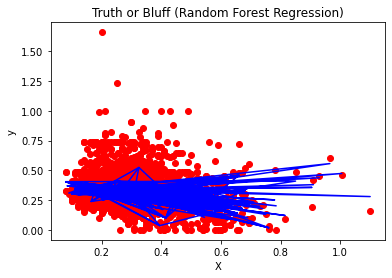

In [17]:
# Visualizing the Training Set X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X.reshape((len(X), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('X')
plt.ylabel('y')
plt.show()